In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

## Part 1: Import the Housing data and do feature transformations

In [16]:
df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/house_price_full.csv')
df.head()

,bedrooms,sqft_living,price
0,3,1340,313000
1,5,3650,2384000
2,3,1930,342000
3,3,2000,420000
4,4,1940,550000


In [17]:
X = df.copy()
# Remove target
Y = X.pop('price')

# perform a scaler transform of the input data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# perform log transformation of target variable (y Log Transformation?)
Y = np.log(Y)

In [18]:
df_scaled = pd.DataFrame(X)
df_scaled

,0,1
0,-0.433198,-0.753258
1,1.675735,1.457330
2,-0.433198,-0.188649
3,-0.433198,-0.121661
4,0.621269,-0.179079
...,...,...
494,0.621269,0.873582
495,1.675735,2.299459
496,-0.433198,-0.724549
497,-0.433198,-0.179079


In [19]:
Y

0      12.653958
1      14.684290
2      12.742566
3      12.948010
4      13.217674
         ...    
494    13.380102
495    13.764217
496    12.128111
497    12.721886
498    12.254863
Name: price, Length: 499, dtype: float64

## Part 2: Create Model Using `keras`

![](https://github.com/clraghuram/tensor-flow-learning/blob/main/multiple_neurons.png?raw=1)

![image.png](
)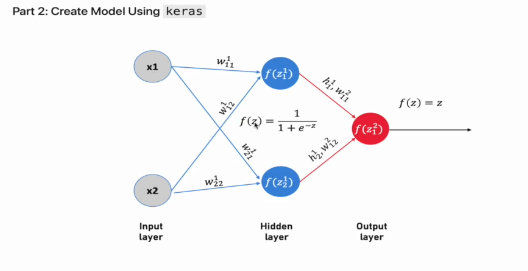

In [20]:
from tensorflow import keras

In [21]:
model = keras.Sequential(
    [
        keras.layers.Dense(
            2, activation="sigmoid", input_shape=(X.shape[-1],)
        ),
        keras.layers.Dense(1, activation="linear")
    ]
)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 6         
                                                                 
 dense_5 (Dense)             (None, 1)                 3         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


```python
def random_init_params():
    w1 = tf.Variable(tf.random.uniform((2, 2)))
    b1 = tf.Variable(tf.random.uniform((1, 2)))
    w2 = tf.Variable(tf.random.uniform((2, 1)))
    b2 = tf.Variable(tf.random.uniform((1, 1)))
    return w1,b1,w2,b2


def forward_prop(x, w1, b1, w2, b2):
    z1 = tf.matmul(x,w1) + b1
    h1 = tf.math.sigmoid(z1)
    z2 = tf.matmul(h1,w2) + b2
    h2 = z2
    return h2
```

In [22]:
model.compile(
    optimizer=keras.optimizers.SGD(), loss="mean_squared_error"
)

```python
def train(x, y, w1, b1, w2, b2):
    y_true = y
    with tf.GradientTape() as g:
        y_pred = forward_prop(x, w1, b1, w2, b2)

        # loss
        loss = 0.5*(y_true - y_pred)** 2
    
    #Gradient calculation  
    print("**************************************************")
    print("GRADIENTS")
    print("**************************************************")
    gw1, gb1, gw2, gb2 = g.gradient(loss, [w1, b1, w2, b2])
    print(" the gradient for 1st layer weights are:\n",gw1.numpy())
    print("--------------------------------------------------")
    print(" the gradient for 2nd layer weights are:\n",gw2.numpy())
    print("--------------------------------------------------")
    print(" the gradient for 1st layer bias are:\n",gb1.numpy())
    print("--------------------------------------------------")
    print(" the gradient for 2nd layer bias are:\n",gb2.numpy())
    print("--------------------------------------------------")

    # Gradient descent:
    lr=0.2
    w1.assign_sub(lr*gw1)
    b1.assign_sub(lr*gb1) 
    w2.assign_sub(lr*gw2)
    b2.assign_sub(lr*gb2)
    print("**************************************************")
    print("NEW UPDATES")
    print("**************************************************")
    print(" the updated 1st layer weights are:\n",w1.numpy())
    print("--------------------------------------------------")
    print(" the updated 2nd layer weights are:\n",w2.numpy())
    print("--------------------------------------------------")
    print(" the updated 1st layer bias are:\n",b1.numpy())
    print("--------------------------------------------------")
    print(" the updated 2nd layer bias are:\n",b2.numpy())


    return w1, b1, w2, b2,loss

```

In [23]:
model.fit(X,Y.values,epochs=10,batch_size=32)

Epoch 1/10
16/16 [==============================] - 0s 2ms/step - loss: 82.3793
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 15.8673
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 2.3980
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.4701
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.2024
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.1647
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.1575
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.1550
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.1535
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.1522


In [24]:
model.predict(X)[:,0]

array([12.858499 , 13.4830065, 13.035571 , 13.055024 , 13.089734 ,
       12.622429 , 12.789006 , 13.27602  , 13.167663 , 12.972672 ,
       12.972325 , 13.320974 , 13.142496 , 12.776095 , 13.348719 ,
       12.81291  , 12.930374 , 13.359645 , 12.868085 , 12.806282 ,
       13.119321 , 12.952026 , 12.984066 , 13.280404 , 12.995864 ,
       13.079567 , 13.15011  , 13.156576 , 13.330596 , 13.209061 ,
       12.984322 , 13.308372 , 13.057457 , 13.299863 , 13.456346 ,
       13.350127 , 12.592428 , 13.012946 , 13.043947 , 13.157669 ,
       12.933415 , 12.960916 , 12.611235 , 12.989896 , 12.7410965,
       12.799624 , 13.046726 , 13.035571 , 12.83588  , 13.398377 ,
       13.27602  , 13.28022  , 13.234941 , 12.9985895, 13.196465 ,
       13.084418 , 13.154082 , 13.484652 , 12.852072 , 12.880575 ,
       13.398377 , 13.227952 , 13.280404 , 13.194646 , 13.320974 ,
       12.629852 , 12.954511 , 12.748764 , 13.17639  , 13.108859 ,
       13.235566 , 13.266873 , 13.176313 , 13.027137 , 12.8552